This Code will explore the .nc data from Axial Fetch

In [2]:
# Import necessary libraries
import xarray as xr
import pandas as pd
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

In [3]:
cd /Users/earthnote/Desktop/AZA/2022/9

/Users/earthnote/Desktop/AZA/2022/9


In [4]:
ls

2022-09-01.local.nc*  2022-09-07.local.nc*  2022-09-19.local.nc*
2022-09-01.remote.nc* 2022-09-08.local.nc*  2022-09-20.local.nc*
2022-09-02.local.nc*  2022-09-09.local.nc*  2022-09-21.local.nc*
2022-09-02.remote.nc* 2022-09-10.local.nc*  2022-09-22.local.nc*
2022-09-03.local.nc*  2022-09-11.local.nc*  2022-09-23.local.nc*
2022-09-03.remote.nc* 2022-09-12.local.nc*  2022-09-24.local.nc*
2022-09-04.local.nc*  2022-09-13.local.nc*  2022-09-25.local.nc*
2022-09-04.remote.nc* 2022-09-14.local.nc*  2022-09-26.local.nc*
2022-09-05.local.nc*  2022-09-15.local.nc*  2022-09-27.local.nc*
2022-09-05.remote.nc* 2022-09-16.local.nc*  2022-09-28.local.nc*
2022-09-06.local.nc*  2022-09-17.local.nc*  2022-09-29.local.nc*
2022-09-06.remote.nc* 2022-09-18.local.nc*  2022-09-30.local.nc*


In [5]:
import glob
import os

# List all .nc files in the directory that contain 'remote'
files = sorted(glob.glob('*.remote.nc'))
files

['2022-09-01.remote.nc',
 '2022-09-02.remote.nc',
 '2022-09-03.remote.nc',
 '2022-09-04.remote.nc',
 '2022-09-05.remote.nc',
 '2022-09-06.remote.nc']

### Analyzing one file at a time

In [48]:
# Open the .nc file
dataset = nc.Dataset('2022-09-01.remote.nc')

if 'address' in dataset.variables:
    print("The dataset has the 'address' variable.")

    # Number of time points associated with each address
    time_points_per_address = len(dataset.variables['time'][:])

    # Extract the variables
    address = dataset.variables['address'][:]
    time = dataset.variables['time'][:]
    pitch = dataset.variables['pitch'][:]
    roll = dataset.variables['roll'][:]
    temperature = dataset.variables['temperature'][:]
    pressure = dataset.variables['pressure'][:]
    secondary_pressure = dataset.variables['secondary_pressure'][:]
    sound_velocity = dataset.variables['sound_velocity'][:]
    range_delay = dataset.variables['range_delay'][:]
    turn_around_time = dataset.variables['turn_around_time'][:]
    sens_response_timestamp = dataset.variables['sens_response_timestamp'][:]
    si_response_timestamp = dataset.variables['si_response_timestamp'][:]
    cs_response_timestamp = dataset.variables['cs_response_timestamp'][:]

    # Create a dictionary of DataFrames, one for each address
    dfs = {}
    for i, addr in enumerate(address):
        df_addr = pd.DataFrame({
            'address': addr,
            'time': time,
            'pitch': pitch[i],
            'roll': roll[i],
            'temperature': temperature[i],
            'pressure': pressure[i],
            'secondary_pressure': secondary_pressure[i],
            'sound_velocity': sound_velocity[i],
            'range_delay0': range_delay[i][0],
            'range_delay1': range_delay[i][1],
            'range_delay2': range_delay[i][2],
            'range_delay3': range_delay[i][3],
            'turn_around_time': turn_around_time[i],
            'si_response_timestamp': si_response_timestamp[i],
            'cs_response_timestamp': cs_response_timestamp[i]
        })

        # Replace high outliers with NaN in 'sound_velocity' column
        df_addr['sound_velocity'] = df_addr['sound_velocity'].replace(9999.000, np.nan)

        # Interpolate the 'sound_velocity' column
        df_addr['sound_velocity'] = df_addr['sound_velocity'].interpolate()

        fill_value = 9.969210e+36
        for j in range(4):
            total_time_s = df_addr[f'range_delay{j}'] * 1e-6 - df_addr['turn_around_time'] * 1e-3
            df_addr[f'distance{j}'] = np.where((total_time_s * 1e6 == fill_value) | (df_addr[f'range_delay{j}'] == 0) | np.isnan(df_addr[f'range_delay{j}']), np.nan, total_time_s / 2 * df_addr['sound_velocity'])

        dfs[addr] = df_addr
else:
    print("The dataset does not have the 'address' variable.")
    # Create a dictionary to hold the data
    data = {}
    # Loop over all variables
    for var in dataset.variables:
        data[var] = dataset.variables[var][:]

    # Create the DataFrame
    df = pd.DataFrame(data)


The dataset has the 'address' variable.


In [49]:
dfs[2501]

,address,time,pitch,roll,temperature,pressure,secondary_pressure,sound_velocity,range_delay0,range_delay1,range_delay2,range_delay3,turn_around_time,si_response_timestamp,cs_response_timestamp,distance0,distance1,distance2,distance3
0,2501,1661996899,0.83,2.26,2.44,66.9,15521.8,1484.570000,NaN,2376916.0,NaN,NaN,80.0,1661996904,1661996858,NaN,1704.966293,NaN,NaN
1,2501,1661996899,0.83,2.26,2.44,66.9,15521.8,1484.570000,NaN,2376916.0,NaN,NaN,80.0,1661996904,1661996858,NaN,1704.966293,NaN,NaN
2,2501,1661997616,0.83,2.25,2.44,66.9,15520.9,1484.569000,NaN,2376942.0,NaN,NaN,80.0,1661997621,1661996858,NaN,1704.984444,NaN,NaN
3,2501,1662001215,0.84,2.26,2.44,66.9,15515.9,1484.563000,NaN,2376979.0,NaN,NaN,80.0,1662001219,1661996858,NaN,1705.005018,NaN,NaN
4,2501,1662004814,0.83,2.25,2.45,66.9,15512.0,1484.568000,NaN,2377009.0,NaN,NaN,80.0,1662004819,1661996858,NaN,1705.033029,NaN,NaN
5,2501,1662008420,0.84,2.26,2.44,66.9,15510.3,1484.554000,NaN,2377014.0,NaN,NaN,80.0,1662008424,1661996858,NaN,1705.020661,NaN,NaN
6,2501,1662008420,0.84,2.26,2.44,66.9,15510.3,1484.554000,NaN,2377014.0,NaN,NaN,80.0,1662008424,1661996858,NaN,1705.020661,NaN,NaN
7,2501,1662011866,0.84,2.25,2.44,66.9,15510.5,1484.549000,NaN,2377020.0,2425061.0,NaN,80.0,1662011871,1662011818,NaN,1705.019372,1740.678981,NaN
8,2501,1662012006,0.84,2.25,2.44,66.9,15510.6,1484.550000,NaN,2377025.0,2425082.0,NaN,80.0,1662012023,1662011818,NaN,1705.024232,1740.695742,NaN
9,2501,1662012006,0.84,2.25,2.44,66.9,15510.6,1484.550000,NaN,2377025.0,2425082.0,NaN,80.0,1662012023,1662011818,NaN,1705.024232,1740.695742,NaN


/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1435552003.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1435552003.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1435552003.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<Figure size 3000x1800 with 0 Axes>

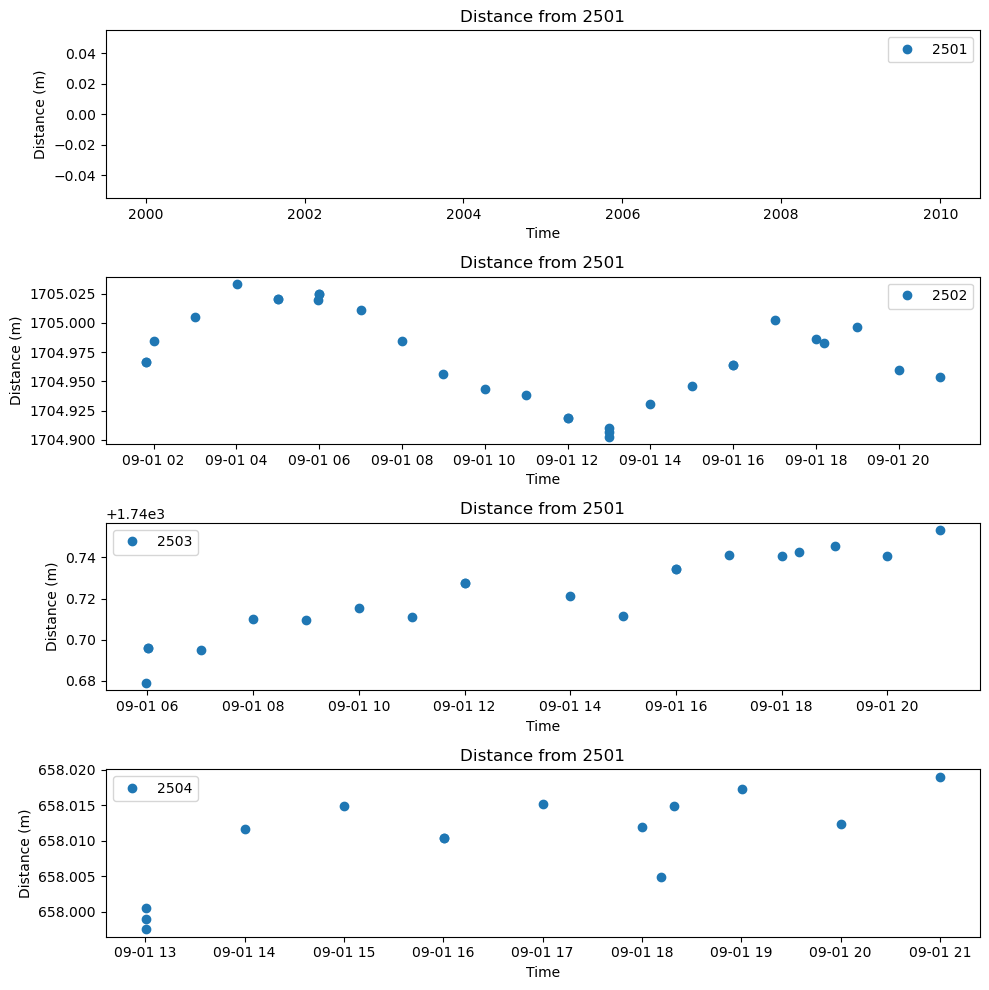

In [50]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

index = 2501

# Define a function to replace outliers with NaN
def replace_outliers_with_nan(series, n_std=2):
    mean = series.mean()
    std = series.std()
    is_outlier = (series - mean).abs() > n_std * std
    series[is_outlier] = np.nan
    return series

# Get the DataFrame for address 2501
df = dfs[index]

# Replace outliers with NaN in each distance column
for i in range(4):
    df[f'distance{i}'] = replace_outliers_with_nan(df[f'distance{i}'])
    

# Convert Unix time to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Create a new figure
plt.figure(figsize=(30, 18))

# Create a 4-row figure for the subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 10))

# Plot each distance on its own subplot
for i in range(4):
    axs[i].plot(df['time'], df[f'distance{i}'],marker='o', linestyle='', label=f'{address.data[i]}')
    axs[i].set_title(f'Distance from {index}')
    axs[i].set_xlabel('Time')
    axs[i].set_ylabel('Distance (m)')
    axs[i].legend()

# Automatically adjust subplot parameters to give specified padding
plt.tight_layout()

# Show the plot
plt.show()    

<Figure size 3000x1800 with 0 Axes>

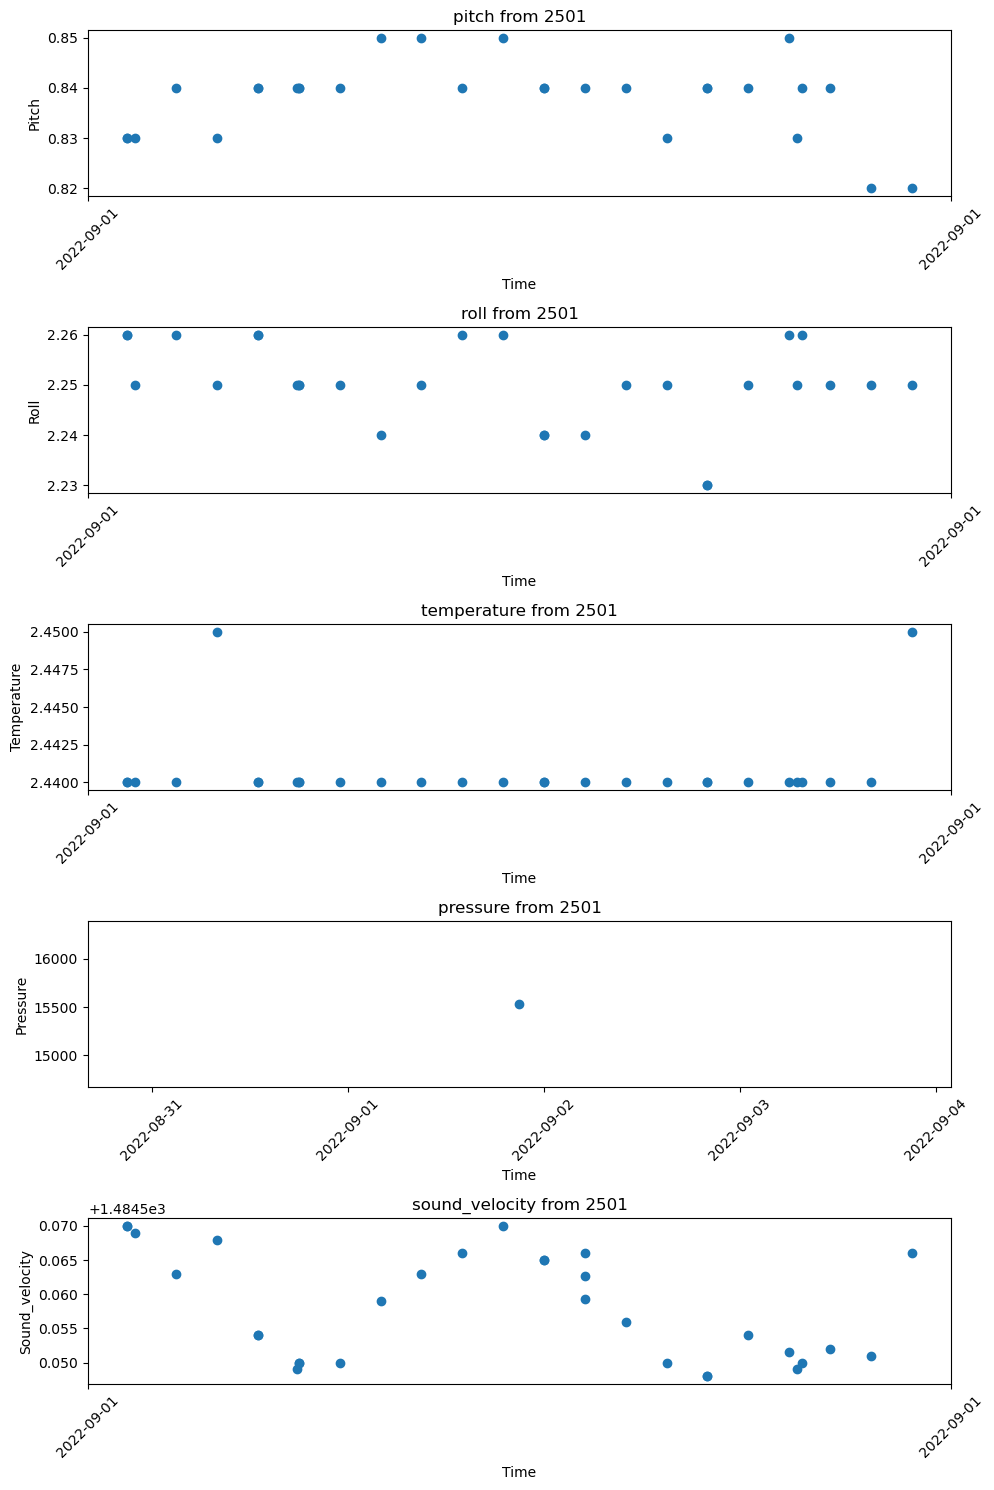

In [51]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Set the address you are interested in
index = 2501

if index in dfs:
    df = dfs[index]

    # Convert Unix time to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # Replace any pressure values less than 10000 with np.nan
    df.loc[df['pressure'] < 12000, 'pressure'] = np.nan
    df.loc[df['pitch'] < -2, 'pitch'] = np.nan
    #df.loc[df['roll'] < 3.5, 'roll'] = np.nan
    df.loc[df['sound_velocity'] < 1483, 'sound_velocity'] = np.nan
    df.loc[df['temperature'] > 2.5, 'temperature'] = np.nan


    # Create a new figure
    plt.figure(figsize=(30, 18))
    # Create a new figure with a subplot for each variable
    fig, axs = plt.subplots(5, 1, figsize=(10, 15))

    # Plot each variable on its own subplot
    variables = ['pitch', 'roll', 'temperature', 'pressure', 'sound_velocity']
    for i, var in enumerate(variables):
        axs[i].plot(df['time'], df[var], marker='o', linestyle='', label=f'{var}')
        axs[i].set_title(f'{var} from {index}')
        axs[i].set_xlabel('Time')
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axs[i].xaxis.set_major_locator(mdates.DayLocator())
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
        axs[i].set_ylabel(var.capitalize())

    # Automatically adjust subplot parameters to give specified padding
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print(f"No data available for address: {index}")


### Analyzing full dataset with multiple files

In [28]:
import glob
import pandas as pd
import netCDF4 as nc
import numpy as np

# List all .nc files in the directory that contain 'remote'
files = sorted(glob.glob('*.remote.nc'))

# Create a dictionary of DataFrames, one for each address
dfs = {}

# Create a DataFrame to hold data where 'address' does not exist
df = pd.DataFrame()

# Loop over all files
for filename in files:
    dataset = nc.Dataset(filename)

    if 'address' in dataset.variables:
        print(f"The dataset in {filename} has the 'address' variable.")

        # Number of time points associated with each address
        time_points_per_address = len(dataset.variables['time'][:])

        # Extract the variables
        address = dataset.variables['address'][:]
        time = dataset.variables['time'][:]
        pitch = dataset.variables['pitch'][:]
        roll = dataset.variables['roll'][:]
        temperature = dataset.variables['temperature'][:]
        pressure = dataset.variables['pressure'][:]
        sound_velocity = dataset.variables['sound_velocity'][:]
        range_delay = dataset.variables['range_delay'][:]
        turn_around_time = dataset.variables['turn_around_time'][:]
        sens_response_timestamp = dataset.variables['sens_response_timestamp'][:]
        si_response_timestamp = dataset.variables['si_response_timestamp'][:]
        cs_response_timestamp = dataset.variables['cs_response_timestamp'][:]

        # Process each address and append to dfs
        for i, addr in enumerate(address):
            # Get the range delays or set them to NaN if they don't exist
            range_delays = [range_delay[i][j] if j < len(range_delay[i]) else np.nan for j in range(4)]

            df_addr = pd.DataFrame({
                'address': addr,
                'time': time,
                'pitch': pitch[i],
                'roll': roll[i],
                'temperature': temperature[i],
                'pressure': pressure[i],
                'sound_velocity': sound_velocity[i],
                'range_delay0': range_delays[0],
                'range_delay1': range_delays[1],
                'range_delay2': range_delays[2],
                'range_delay3': range_delays[3],
                'turn_around_time': turn_around_time[i],
                'si_response_timestamp': si_response_timestamp[i],
                'cs_response_timestamp': cs_response_timestamp[i]
            })

            # Replace high outliers with NaN in 'sound_velocity' column
            df_addr['sound_velocity'] = df_addr['sound_velocity'].replace(9999.000, np.nan)

            # Interpolate the 'sound_velocity' column
            df_addr['sound_velocity'] = df_addr['sound_velocity'].interpolate()

            fill_value = 9.969210e+36
            for j in range(4):
                total_time_s = df_addr[f'range_delay{j}'] * 1e-6 - df_addr['turn_around_time'] * 1e-3
                df_addr[f'distance{j}'] = np.where((total_time_s * 1e6 == fill_value) | (df_addr[f'range_delay{j}'] == 0) | np.isnan(df_addr[f'range_delay{j}']), np.nan, total_time_s / 2 * df_addr['sound_velocity'])

            # If address already exists in dfs, append to it, else create new DataFrame
            if addr in dfs:
                dfs[addr] = dfs[addr].append(df_addr, ignore_index=True)
            else:
                dfs[addr] = df_addr
    else:
        print(f"The dataset in {filename} does not have the 'address' variable.")

        # Create a dictionary to hold the data
        data = {}
        # Loop over all variables
        for var in dataset.variables:
            data[var] = dataset.variables[var][:]

        # Create a new DataFrame and append to df
        df_new = pd.DataFrame(data)
        df = df.append(df_new, ignore_index=True)

        


The dataset in 2022-09-01.remote.nc has the 'address' variable.
The dataset in 2022-09-02.remote.nc has the 'address' variable.
The dataset in 2022-09-03.remote.nc has the 'address' variable.
The dataset in 2022-09-04.remote.nc has the 'address' variable.
The dataset in 2022-09-05.remote.nc has the 'address' variable.
The dataset in 2022-09-06.remote.nc has the 'address' variable.


<Figure size 3000x1800 with 0 Axes>

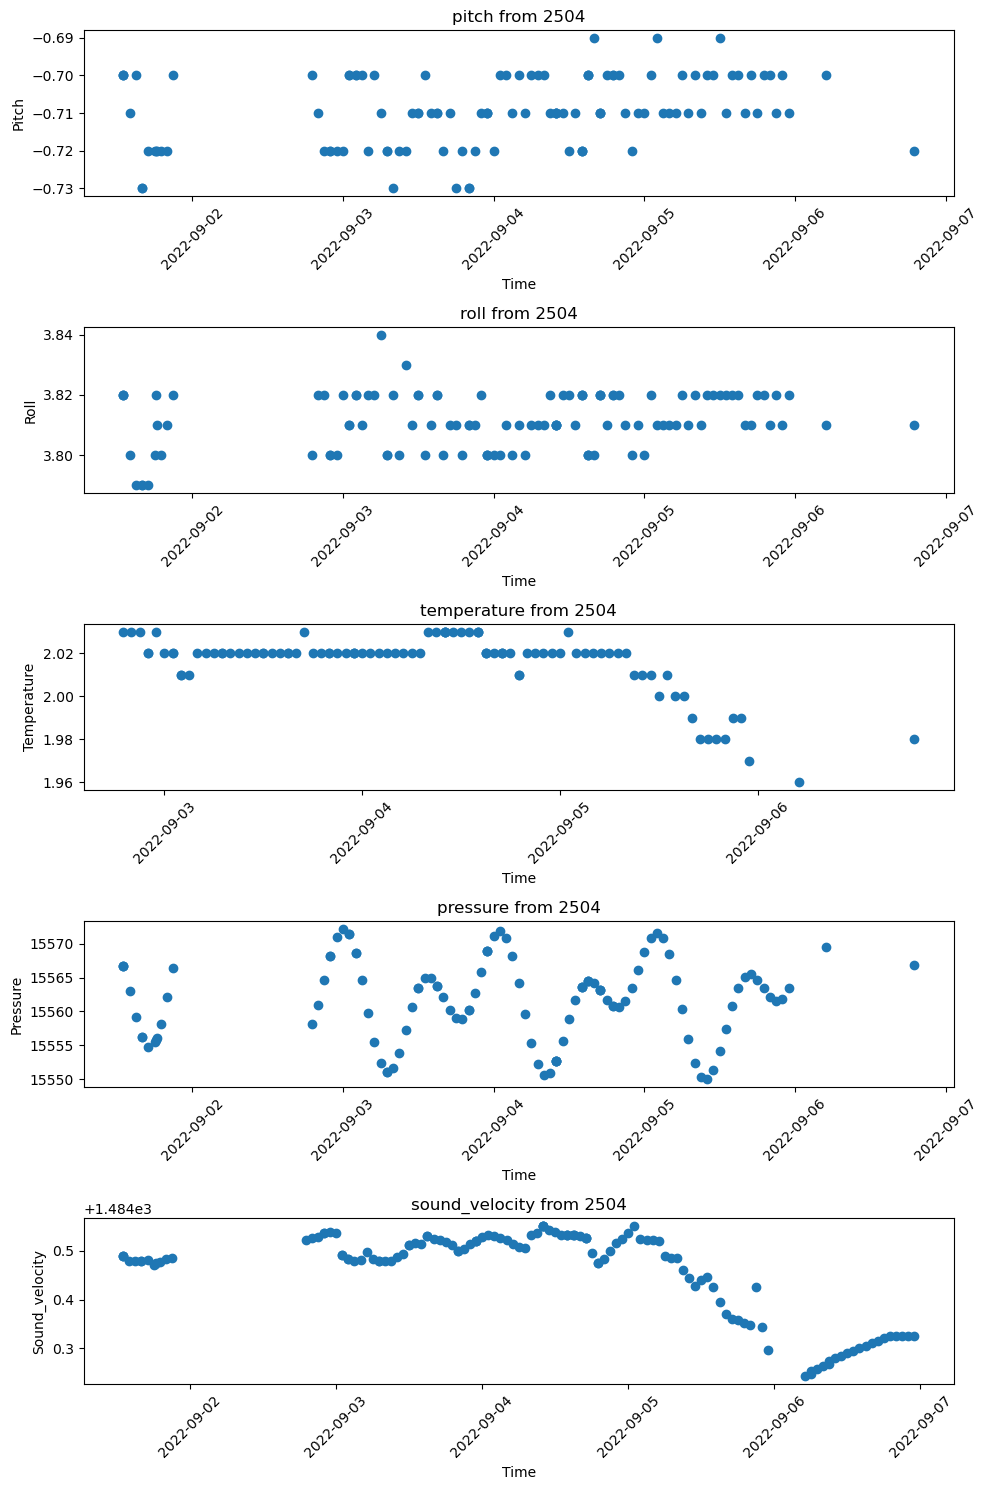

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

# Set the address you are interested in
index = 2504

if index in dfs:
    df = dfs[index]

    # Convert Unix time to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')

    # Replace any pressure values less than 10000 with np.nan
    #df.loc[df['pressure'] < 15000, 'pressure'] = np.nan
    #df.loc[df['pitch'] < -2, 'pitch'] = np.nan
    #df.loc[df['roll'] < 3.5, 'roll'] = np.nan
    #df.loc[df['sound_velocity'] < 1483, 'sound_velocity'] = np.nan
    #df.loc[df['temperature'] > 2.1, 'temperature'] = np.nan


    # Create a new figure
    plt.figure(figsize=(30, 18))
    # Create a new figure with a subplot for each variable
    fig, axs = plt.subplots(5, 1, figsize=(10, 15))

    # Plot each variable on its own subplot
    variables = ['pitch', 'roll', 'temperature', 'pressure', 'sound_velocity']
    for i, var in enumerate(variables):
        axs[i].plot(df['time'], df[var], marker='o', linestyle='', label=f'{var}')
        axs[i].set_title(f'{var} from {index}')
        axs[i].set_xlabel('Time')
        axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
        axs[i].xaxis.set_major_locator(mdates.DayLocator())
        plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
        axs[i].set_ylabel(var.capitalize())

    # Automatically adjust subplot parameters to give specified padding
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print(f"No data available for address: {index}")


/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1805621583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1805621583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[is_outlier] = np.nan
/var/folders/4v/r6b_tqkn06347qqtqshm4lhr0000gp/T/ipykernel_35650/1805621583.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

<Figure size 3000x1800 with 0 Axes>

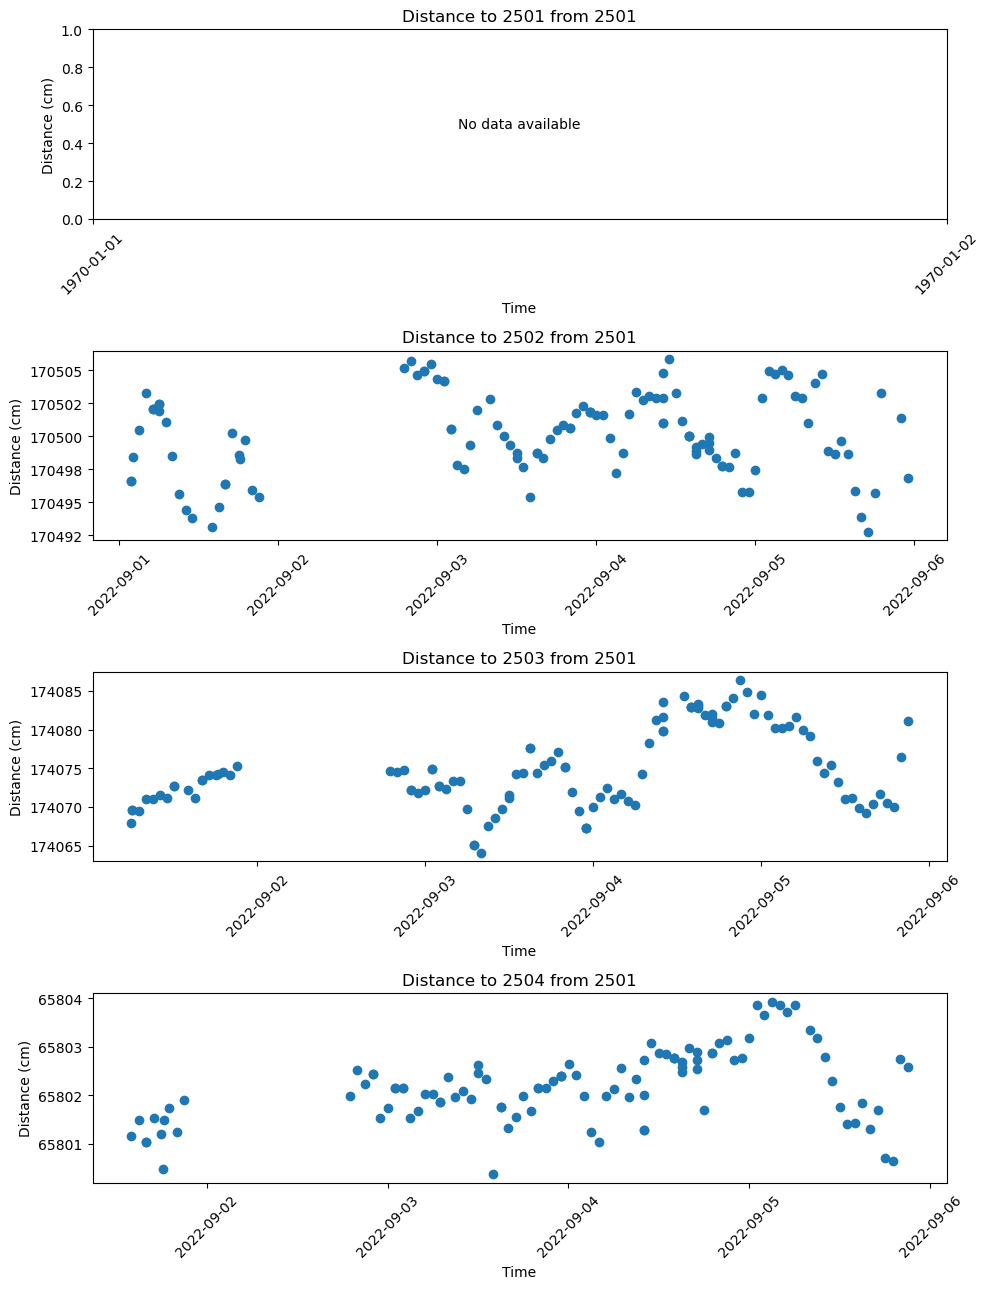

In [47]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from matplotlib.ticker import FuncFormatter

# Define a function to replace outliers with NaN
def replace_outliers_with_nan(series, n_std=2):
    mean = series.mean()
    std = series.std()
    is_outlier = (series - mean).abs() > n_std * std
    series[is_outlier] = np.nan
    return series

# Set the address you are interested in
index = 2501

if index in dfs:
    df = dfs[index]
    
    for i in range(4):
        df[f'distance{i}'] = replace_outliers_with_nan(df[f'distance{i}'])
    
    # Convert Unix time to datetime
    df['time'] = pd.to_datetime(df['time'], unit='s')
    adr=[2501,2502,2503,2504]

    # Create a new figure
    plt.figure(figsize=(30, 18))

    # Create a 4-row figure for the subplots
    fig, axs = plt.subplots(4, 1, figsize=(10, 13))

    # Function to customize y-axis labels
    formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))

    # Plot each distance on its own subplot
    for i in range(4):
        # Check if all values for distance{i} are NaN
        if not df[f'distance{i}'].isna().all():
            axs[i].scatter(df['time'], df[f'distance{i}']*100)  # Multiply by 100 to convert from meters to cm
            axs[i].set_title(f'Distance to {adr[i]} from {index}')
            axs[i].set_xlabel('Time')
            axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axs[i].xaxis.set_major_locator(mdates.DayLocator())
            plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
            axs[i].set_ylabel('Distance (cm)')  # Update to 'Distance (cm)'
            axs[i].yaxis.set_major_formatter(formatter)  # Use the custom formatter for the y-axis labels
            
        else:
            axs[i].text(0.5, 0.5, 'No data available', horizontalalignment='center',
                        verticalalignment='center', transform=axs[i].transAxes)
            axs[i].set_title(f'Distance to {adr[i]} from {index}')
            axs[i].set_xlabel('Time')
            axs[i].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
            axs[i].xaxis.set_major_locator(mdates.DayLocator())
            plt.setp(axs[i].xaxis.get_majorticklabels(), rotation=45)
            axs[i].set_ylabel('Distance (cm)')  # Update to 'Distance (cm)'

    # Automatically adjust subplot parameters to give specified padding
    plt.tight_layout()

    # Show the plot
    plt.show()
else:
    print(f"No data available for address: {index}")
